# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

#X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(1000, 100, 100)
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

print X_train.shape, y_train.shape

(49000, 32, 32, 3) (49000,)


## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

print X_train[0].shape

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat2 = np.std(X_train_feats, axis=0)
print '#std_feat2.shape: ', std_feat2.shape
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
print '#std_feat.shape: ', std_feat.shape
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
print 'X_train_feats.shape: ', X_train_feats.shape
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
print 'X_train_feats.shape: ', X_train_feats.shape
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])


(32, 32, 3)
#feature_fn:  <function hog_feature at 0x7f814a012a28>
#feats.shape:  (144,)
#feature_fn:  <function <lambda> at 0x7f8170be4320>
#feats.shape:  (10,)
#feature_dims:  [144, 10]
#first_image_features len:  2
Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 4900

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [1e5, 1e6, 1e7]
learning_rates = [1e-7, 5e-8]
regularization_strengths = [5e4, 5e5]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
import itertools
for lr, reg in itertools.product(learning_rates, regularization_strengths):
    svm = LinearSVM()
    svm.train(X_train_feats, y_train, lr, reg, num_iters=1000, verbose=True)
    
    y_pred_train = svm.predict(X_train_feats)
    acc_train = np.mean(y_pred_train == y_train)   
    y_pred_val = svm.predict(X_val_feats)
    acc_val = np.mean(y_pred_val == y_val)
    results[(lr, reg)] = (acc_train, acc_val)
    if acc_val > best_val:
        best_val = acc_val
        best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 1000: loss 47.583695
iteration 100 / 1000: loss 23.166166
iteration 200 / 1000: loss 14.194155
iteration 300 / 1000: loss 10.906363
iteration 400 / 1000: loss 9.699071
iteration 500 / 1000: loss 9.255665
iteration 600 / 1000: loss 9.093510
iteration 700 / 1000: loss 9.034135
iteration 800 / 1000: loss 9.011657
iteration 900 / 1000: loss 9.003808
iteration 0 / 1000: loss 393.255608
iteration 100 / 1000: loss 9.013497
iteration 200 / 1000: loss 8.999936
iteration 300 / 1000: loss 8.999928
iteration 400 / 1000: loss 8.999933
iteration 500 / 1000: loss 8.999936
iteration 600 / 1000: loss 8.999928
iteration 700 / 1000: loss 8.999939
iteration 800 / 1000: loss 8.999932
iteration 900 / 1000: loss 8.999916
iteration 0 / 1000: loss 48.666883
iteration 100 / 1000: loss 33.033928
iteration 200 / 1000: loss 23.576003
iteration 300 / 1000: loss 17.837860
iteration 400 / 1000: loss 14.351982
iteration 500 / 1000: loss 12.251346
iteration 600 / 1000: loss 10.963127
iteration 700 / 1000:

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy
# 0.422

0.413


#idxs.shape:  (134,)
#selected:  [492 977 917 454 420 630 974 787]
#idxs.shape:  (63,)
#selected:  [259 528 383 969 680 328 729 111]
#idxs.shape:  (46,)
#selected:  [907  85  27  49 271 475 570 849]
#idxs.shape:  (22,)
#selected:  [893 923 427 922 808 319 632 720]
#idxs.shape:  (13,)
#selected:  [430 444 195 919 715 799 556 834]
#idxs.shape:  (71,)
#selected:  [664 109 279   0 354 266  61 932]
#idxs.shape:  (75,)
#selected:  [318 618 657 393 232 256 436 933]
#idxs.shape:  (58,)
#selected:  [689  93  30 916 505 229 303 608]
#idxs.shape:  (60,)
#selected:  [398 638  87 975 509   3 305  44]
#idxs.shape:  (45,)
#selected:  [840 760 596 941 515 168 934 595]


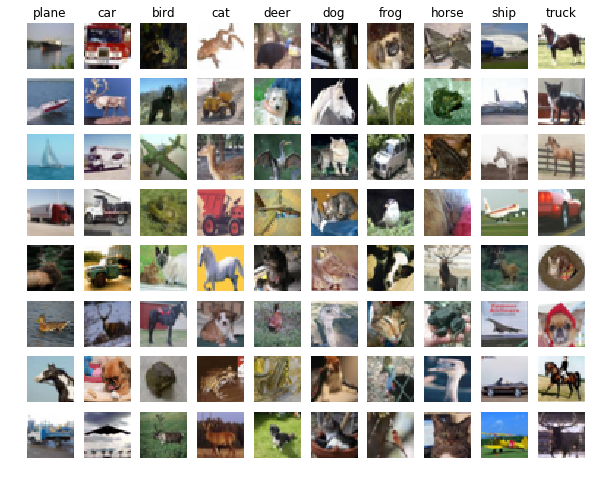

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
#examples_per_class = 1
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    print '#idxs.shape: ', idxs.shape
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    print '#selected: ', idxs
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Yes, they make sense; the mis-classified images look a lot similar to the target being incorrectly labeled as. 

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print X_train_feats.shape

(49000, 155)


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_acc = -1

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
print 'input_dim, hidden_dim, num_classes:', input_dim, hidden_dim, num_classes
print 'X_train_feats.shape, y_train.shape:', X_train_feats.shape, y_train.shape
print 'X_val_feats.shape, y_val.shape:', X_val_feats.shape, y_val.shape
best_params = None

hidden_dims = [100, 200, 300, 400, 500]
lrs = [2, 1, 0.5]
regs = [0.01, 0.001, 0.0001]
import itertools
for hidden_dim, lr, reg in itertools.product(hidden_dims, lrs, regs):
    print '# hidden_dim, lr, reg: ', hidden_dim, lr, reg
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)
    net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=1000, batch_size=200,
        learning_rate=lr, learning_rate_decay=0.95,
        reg=reg, verbose=False)

    val_acc = np.mean(net.predict(X_val_feats) == y_val)
    print 'Validation accuracy: ', val_acc
    if val_acc > best_acc:
        best_acc = val_acc
        best_net = net
        best_params = hidden_dim, lr, reg
net = best_net
print '#best_acc: ', best_acc
print '#best_params (hidden_dim, lr, reg): ', best_params
#best_acc:  0.595
#best_params (hidden_dim, lr, reg):  (300, 0.5, 0.0001)

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

input_dim, hidden_dim, num_classes: 155 500 10
X_train_feats.shape, y_train.shape: (49000, 155) (49000,)
X_val_feats.shape, y_val.shape: (1000, 155) (1000,)
# hidden_dim, lr, reg:  100 2 0.01
#iterations_per_epoch:  245
Validation accuracy:  0.531
# hidden_dim, lr, reg:  100 2 0.001
#iterations_per_epoch:  245
Validation accuracy:  0.542
# hidden_dim, lr, reg:  100 2 0.0001
#iterations_per_epoch:  245
Validation accuracy:  0.525
# hidden_dim, lr, reg:  100 1 0.01
#iterations_per_epoch:  245
Validation accuracy:  0.49
# hidden_dim, lr, reg:  100 1 0.001
#iterations_per_epoch:  245
Validation accuracy:  0.517
# hidden_dim, lr, reg:  100 1 0.0001
#iterations_per_epoch:  245
Validation accuracy:  0.545
# hidden_dim, lr, reg:  100 0.5 0.01
#iterations_per_epoch:  245
Validation accuracy:  0.525
# hidden_dim, lr, reg:  100 0.5 0.001
#iterations_per_epoch:  245
Validation accuracy:  0.561
# hidden_dim, lr, reg:  100 0.5 0.0001
#iterations_per_epoch:  245
Validation accuracy:  0.563
# hidden_d

In [9]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc
#0.579

0.565


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!